# COMP0005 - GROUP COURSEWORK 2023-24
# Gesture Recognition via Convex Hull 

Use the cell below for all python code needed to realise the **Jarvis march algorithm** (including auxiliary data structures and functions needed by this algorithm - if any). The `jarvismarch()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points (`outputSet`) that lie on the convex hull.

In [2]:
import matplotlib.pyplot as plt
import random
import timeit
import math

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y


In [3]:
def orientation(p, q, r):
    """
    Function to find the orientation of an ordered triplet (p, q, r).
    Returns:
     0 : Collinear points
     1 : Clockwise points
     2 : Counterclockwise points
    """
    val = (q.y - p.y) * (r.x - q.x) - (q.x - p.x) * (r.y - q.y)
    if val == 0:
        return 0  # Collinear
    return 1 if val > 0 else 2  # Clockwise or Counterclockwise

In [4]:
def jarvis_march(points):
    """
    Implementation of Jarvis March algorithm to find the convex hull of a set of points.
    """
    n = len(points)
    if n < 3:
        print("Jarvis March requires at least 3 points.")
        return []

    hull = []

    # Find the leftmost lowest point as the starting point
    start_point = min(points, key=lambda p: (p.y, p.x))
    current_point = start_point

    while True:
        hull.append(current_point)
        next_point = points[0]

        # Iterate through all points to find the next point in the convex hull
        for candidate_point in points:
            if candidate_point != current_point:
                orientation_val = orientation(current_point, next_point, candidate_point)

                # Handle collinear and counterclockwise points
                if orientation_val == 0 or orientation_val == 2:
                    # Calculate the cross product to determine the next point
                    cross_product = (candidate_point.x - current_point.x) * (next_point.y - current_point.y) - \
                                    (candidate_point.y - current_point.y) * (next_point.x - current_point.x)
                    if cross_product > 0:  # Candidate point is more counterclockwise
                        next_point = candidate_point
                    elif cross_product == 0:
                        # If collinear, choose the farthest point
                        dist_current_candidate = (candidate_point.x - current_point.x) ** 2 + \
                                                  (candidate_point.y - current_point.y) ** 2
                        dist_current_next = (next_point.x - current_point.x) ** 2 + \
                                             (next_point.y - current_point.y) ** 2
                        if dist_current_candidate > dist_current_next:
                            next_point = candidate_point
                # Handle clockwise points
                elif orientation_val == 1:
                    next_point = candidate_point

        current_point = next_point

        if current_point == start_point:
            break

    return hull

Use the cell below for all python code needed to realise the **Graham scan** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [5]:
def polarAngle(p0, p1):
    yDistance = p1.y - p0.y
    xDistance = p1.x - p0.x
    angle = math.atan2(yDistance, xDistance)
    if angle < 0:
        angle += 2 * math.pi
    return angle

def distance(p0, p1):
    # Returns the square of the distance between two points
    return (p0.x - p1.x) * 2 + (p0.y - p1.y) * 2

def counterClockwise(p1, p2, p3):
    # Returns true if the sequence of points makes a counter-clockwise turn
    return ((p2.x - p1.x) * (p3.y - p1.y) - (p2.y - p1.y) * (p3.x - p1.x)) > 0

In [6]:
def grahamscan(inputSet):
    # Find point P which has the lowest y-coordinate (use the lowest x in case of ties)
    P = min(inputSet, key=lambda point: (point.y, point.x))
    
    # Array of points sorted by the angle they and the point P make with the x-axis
    sortedPoints = sorted(inputSet, key=lambda point: (polarAngle(P, point), -distance(P, point)))

    # Initialise our convex hull
    outputSet = [P]
    
    # Add new points to convex hull only if we take an anti-clockwise turn
    for newPoint in sortedPoints[1:]:
        while len(outputSet) >= 2 and not counterClockwise(outputSet[-2], outputSet[-1], newPoint):
            outputSet.pop()
        outputSet.append(newPoint)

    return outputSet

Use the cell below for all python code needed to realise the **Chen's** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `chen()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [7]:
def Hull2D(inputSet, m, H):
    flattened_subsets = []
    p=[]
    L=0 # the index for incomplete list
    for i in range(0, len(inputSet), m):
        subset = inputSet[i:min(i+m,len(inputSet))]
         #create subsets of size m  
        subset = grahamscan(subset) 
        flattened_subsets.extend(subset) # add to the big array
    start_point = min(flattened_subsets, key=lambda p: (p.y, p.x))# find the lowest point and set as start
    p.append(start_point)


    for k in range(0,H):
        current_point = p[k]
        if current_point == flattened_subsets[0]:
            next_point = flattened_subsets[1]
        else:
            next_point = flattened_subsets[0] #initialize the next point
    
        for candidate_point in flattened_subsets: # interate every point in the set
            if candidate_point != current_point:
                orientation_val = orientation(current_point, next_point, candidate_point)
                # Handle collinear and counterclockwise points
                if orientation_val == 0 or orientation_val == 2:
                    # Calculate the cross product to determine the next point
                    cross_product = (candidate_point.x - current_point.x) * (next_point.y - current_point.y) - \
                                    (candidate_point.y - current_point.y) * (next_point.x - current_point.x)
                    if cross_product > 0:  # Candidate point is more counterclockwise
                        next_point = candidate_point
                    elif cross_product == 0:
                        # If collinear, choose the farthest point
                        dist_current_candidate = (candidate_point.x - current_point.x) ** 2 + \
                                                  (candidate_point.y - current_point.y) ** 2
                        dist_current_next = (next_point.x - current_point.x) ** 2 + \
                                             (next_point.y - current_point.y) ** 2
                        if dist_current_candidate > dist_current_next:
                            next_point = candidate_point
                # Handle clockwise points
                if orientation_val == 1:
                    next_point = candidate_point
    

        
        if p[0]==next_point:
            L=1 # if finished, return the list
            return L,p
        
        p.append(next_point)
         # join the ponts to the list
    L=0     
    return L,p  #if fails, return incomplete

In [8]:
def chen(inputSet):
    '''
    Returns the list of points that lie on the convex hull (chen's algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points
    '''
    t = 1
    length = len(inputSet)
    L=0
    while True:
        m = H = min(2**2**t, length) # set the size of the subsets and value of H
        L,p = Hull2D(inputSet, m, H)
        
        if L==1: # if the list is complete, return it
            break
        if L==0: # if the list is incomplete, increase the value of t
            if min(2**2**(t), length) == length:
                break
            t = t+1
    return p

Use the cell below to implement the **synthetic data generator** needed by your experimental framework (including any auxiliary data structures and functions you might need - be mindful of code readability and reusability).

In [9]:
class TestDataGenerator():
    """
    A class to represent a synthetic data generator.

    ...

    Attributes
    ----------
    
    [to be defined as part of the coursework]

    Methods
    -------
    
    [to be defined as part of the coursework]

    """
        
    #ADD YOUR CODE HERE
    
    def __init__(self, n, h):  # Generate a sample with n points and h vertices of convex hull
        self.n = n
        self.h = h
        
        
    def __generate_random_linear_points(self):  # Deal with case h = 2
        # Constants for the range
        MIN_VAL = 0
        MAX_VAL = 2**15 - 1

        # Randomly choose two distinct points (x1, y1) and (x2, y2)
        x1, x2 = random.sample(range(MIN_VAL, MAX_VAL + 1), 2)
        y1, y2 = random.sample(range(MIN_VAL, MAX_VAL + 1), 2)

        # Calculate slope (m) and y-intercept (c) for the line through these points
        # To avoid division by zero, ensure x1 != x2, which is guaranteed by random.sample
        m = (y2 - y1) / (x2 - x1)
        c = y1 - m * x1

        # Generate additional points on this line
        points = []

        while True:
            if len(points) >= self.n:
                break
                
            x = random.randint(MIN_VAL, MAX_VAL)
            y = int(m * x + c)

            # Ensure y is within the range
            if MIN_VAL <= y <= MAX_VAL:
                points.append(Point(x, y))
            else:
                # Try a different x if y is out of range
                continue

        return points

        

    def __generate_random_convex_polygon(self):
        # Generate two lists of random X and Y coordinates
        xPool = [random.randint(0, 2**15 - 1) for _ in range(self.h)]
        yPool = [random.randint(0, 2**15 - 1) for _ in range(self.h)]

        # Sort them
        xPool.sort()
        yPool.sort()

        # Isolate the extreme points
        minX, maxX = xPool[0], xPool[-1]
        minY, maxY = yPool[0], yPool[-1]

        # Divide the interior points into two chains & Extract the vector components
        xVec, yVec = [], []

        lastTop, lastBot = minX, minX

        for i in range(1, self.h - 1):
            x = xPool[i]

            if random.choice([True, False]):
                xVec.append(x - lastTop)
                lastTop = x
            else:
                xVec.append(lastBot - x)
                lastBot = x

        xVec.append(maxX - lastTop)
        xVec.append(lastBot - maxX)

        lastLeft, lastRight = minY, minY

        for i in range(1, self.h - 1):
            y = yPool[i]

            if random.choice([True, False]):
                yVec.append(y - lastLeft)
                lastLeft = y
            else:
                yVec.append(lastRight - y)
                lastRight = y

        yVec.append(maxY - lastLeft)
        yVec.append(lastRight - maxY)

        # Randomly pair up the X- and Y-components
        random.shuffle(yVec)

        # Combine the paired up components into vectors
        vec = [Point(xVec[i], yVec[i]) for i in range(self.h)]

        # Sort the vectors by angle
        vec.sort(key=lambda v: math.atan2(v.y, v.x))

        # Lay them end-to-end
        x, y = 0, 0
        minPolygonX, minPolygonY = 0, 0
        points = []

        for v in vec:
            points.append(Point(x, y))

            x += v.x
            y += v.y

            minPolygonX, minPolygonY = min(minPolygonX, x), min(minPolygonY, y)

        # Move the polygon to the original min and max coordinates
        xShift, yShift = minX - minPolygonX, minY - minPolygonY

        shifted_points = [Point(p.x + xShift, p.y + yShift) for p in points]

        return shifted_points
        
    def __triangle_area(self, A, B, C):
        """Calculate the area of a triangle given by vertices A, B, and C as Point instances."""
        return abs((A.x * (B.y - C.y) + B.x * (C.y - A.y) + C.x * (A.y - B.y)) / 2.0)


    def __random_point_in_triangle(self, A, B, C):
        """Generate a random point within the triangle defined by vertices A, B, and C."""
        r1, r2 = random.random(), random.random()
        if r1 + r2 > 1:
            r1, r2 = 1 - r1, 1 - r2
        px = int(A.x + r1 * (B.x - A.x) + r2 * (C.x - A.x))
        py = int(A.y + r1 * (B.y - A.y) + r2 * (C.y - A.y))
        return Point(px, py)


    def __generate_points_in_polygon(self, triangles):
        areas = [self.__triangle_area(*tri) for tri in triangles]
        total_area = sum(areas)
        probabilities = [area / total_area for area in areas]

        points = []
        # Determine how many points go in each triangle
        # Simulate the multinomial distribution by selecting a triangle for each point based on the triangle areas
        for _ in range(self.n - self.h):
            # Choose a triangle index based on the area probabilities
            tri_index = random.choices(range(len(triangles)), weights=probabilities, k=1)[0]
            # Generate a point in the chosen triangle
            points.append(self.__random_point_in_triangle(*triangles[tri_index]))

        return points

    
    def __polygon_to_triangles(self, vertices):
        triangles = []
        for i in range(1, len(vertices)-1):
            now_triangle = [vertices[0], vertices[i], vertices[i+1]]
            triangles.append(now_triangle)
            
        return triangles
            
            
    def generate(self):
        if self.h < 2 or self.n < self.h:
            print("Invalid n and h.")
            return []
        
        elif self.h == 2:
            line = self.__generate_random_linear_points()
            return line
        
        else:
            polygon = self.__generate_random_convex_polygon()

            x_polygon, y_polygon = [], []
            for i in range(len(polygon)):
                x_polygon.append(polygon[i].x)
                y_polygon.append(polygon[i].y)


            triangles = self.__polygon_to_triangles(polygon)
            in_polygon = self.__generate_points_in_polygon(triangles)

            return polygon + in_polygon


Use the cell below to implement the requested **experimental framework** API.

In [10]:
import timeit

class ExperimentalFramework:
    def __init__(self, alg, n, h):
        self.alg = alg
        self.n = n
        self.h = h
        
    def time(self):
        # Generate the input set outside of the timeit setup to ensure it's the same for each run
        generator = TestDataGenerator(self.n, self.h)
        inputSet = generator.generate()
        
        # Define the algorithm to test as a local function so it can be used in timeit
        def test_alg():
            self.alg(inputSet)
        
        # Measure the execution time without using a separate setup string, 
        # since we now use a local function that has access to `inputSet`
        execution_time = timeit.timeit('test_alg()', globals={'test_alg': test_alg}, number=1)
        
        return execution_time
        

Use the cell below to illustrate the python code you used to **fully evaluate** the three convex hull algortihms under considerations. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each algorithm using such data, collect information about their execution time, plots results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

In [11]:
tester = ExperimentalFramework(chen, 10, 5)

In [16]:
# Worst case scenario: h = n

x = []
timeJarvis, timeGraham, timeChen = [], [], []


for i in range(10, 5000, 100):
    x.append(i)
    tester.n = i
    tester.h = i
    
    tester.alg = jarvis_march
    timeJarvis.append(tester.time())
    
    tester.alg = chen
    timeChen.append(tester.time())
    
    tester.alg = grahamscan
    timeGraham.append(tester.time())
    
    print(i)
    
plt.plot(x, timeJarvis, label="Jarvis March")
plt.plot(x, timeChen, label="Chen")
plt.plot(x, timeGraham, label="Graham Scan")

plt.title("Worst case scenario")
plt.xlabel("n")
plt.ylabel("time in seconds")

plt.legend()
plt.show()

10
110
210
310
410
510
610
710
810
910
1010
1110
1210
1310
1410
1510


KeyboardInterrupt: 

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


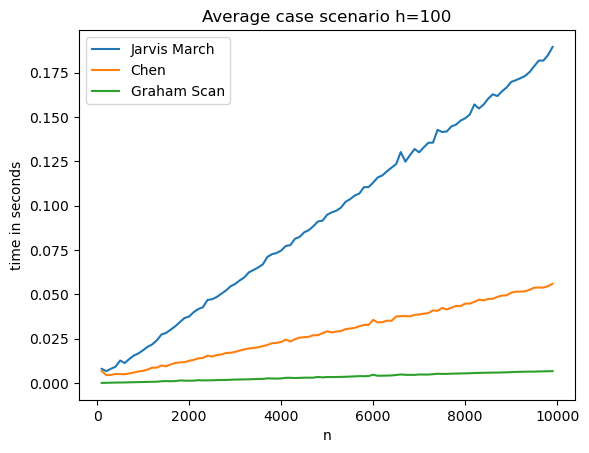

In [18]:
# Average case scenario: h = log2(n) or h = 100

x = []
timeJarvis, timeGraham, timeChen = [], [], []


for i in range(100, 10000, 100):
    x.append(i)
    tester.n = i
    tester.h = 100
    
    tester.alg = jarvis_march
    timeJarvis.append(tester.time())
    
    tester.alg = chen
    timeChen.append(tester.time())
    
    tester.alg = grahamscan
    timeGraham.append(tester.time())
    
    print(i)
    
plt.plot(x, timeJarvis, label="Jarvis March")
plt.plot(x, timeChen, label="Chen")
plt.plot(x, timeGraham, label="Graham Scan")

plt.title("Average case scenario h=100")
plt.xlabel("n")
plt.ylabel("time in seconds")

plt.legend()
plt.show()

10
110
210
310
410
510
610
710
810
910
1010
1110
1210
1310
1410
1510
1610
1710
1810
1910
2010
2110
2210
2310
2410
2510
2610
2710
2810
2910
3010
3110
3210
3310
3410
3510
3610
3710
3810
3910
4010
4110
4210
4310
4410
4510
4610
4710
4810
4910


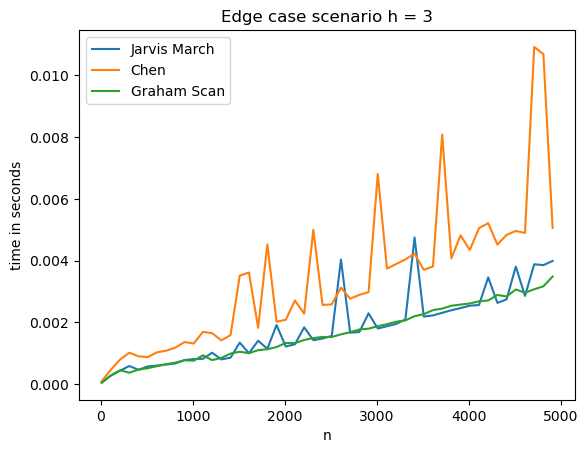

In [14]:
# Edge case scenario: h = 3

x = []
timeJarvis, timeGraham, timeChen = [], [], []


for i in range(10, 5000, 100):
    x.append(i)
    tester.n = i
    tester.h = 3
    
    tester.alg = jarvis_march
    timeJarvis.append(tester.time())
    
    tester.alg = chen
    timeChen.append(tester.time())
    
    tester.alg = grahamscan
    timeGraham.append(tester.time())
    
    print(i)
    
plt.plot(x, timeJarvis, label="Jarvis March")
plt.plot(x, timeChen, label="Chen")
plt.plot(x, timeGraham, label="Graham Scan")

plt.title("Edge case scenario h = 3")
plt.xlabel("n")
plt.ylabel("time in seconds")

plt.legend()
plt.show()

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900


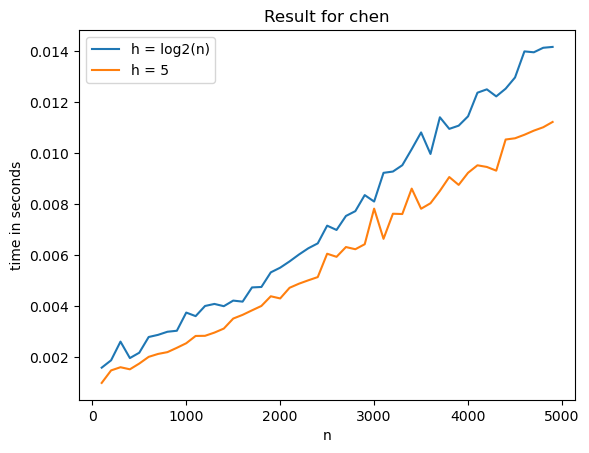

In [179]:
# Separate algorithm tester

x = []
timeN, timelog2N, time5 = [], [], []
algorithm = "chen"


for i in range(100, 5000, 100):
    x.append(i)
    tester.n = i
    tester.alg = chen
    
    
#     tester.h = i    
#     timeN.append(tester.time())
    
    tester.h = int(math.log2(i))
    timelog2N.append(tester.time())
    
    tester.h = 5
    time5.append(tester.time())
    
    
    
    print(i)
    
# plt.plot(x, timeN, label="h = n")
plt.plot(x, timelog2N, label="h = log2(n)")
plt.plot(x, time5, label="h = 5")

plt.title(f"Result for {algorithm}")
plt.xlabel("n")
plt.ylabel("time in seconds")

plt.legend()
plt.show()

50
150
250
350
450
550
650
750
850
950
1050
1150
1250
1350
1450
1550
1650
1750
1850
1950
2050
2150
2250
2350
2450
2550
2650
2750
2850
2950


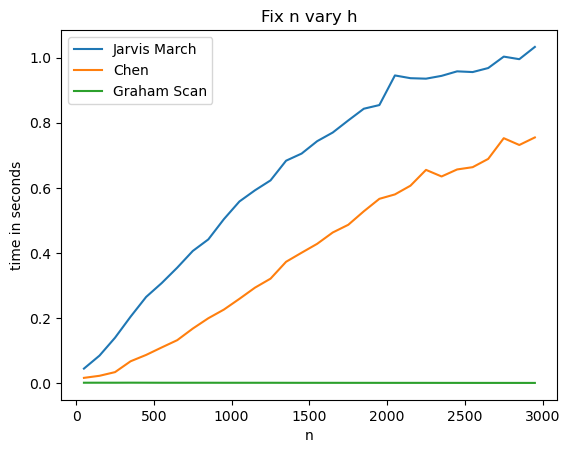

In [48]:
# Fix n vary h analyser

x = []
timeJarvis, timeGraham, timeChen = [], [], []

tester.n = 3000


for i in range(50, tester.n, 100):
    x.append(i)
    tester.h = i
    
    tester.alg = jarvis_march
    timeJarvis.append(tester.time())
    
    tester.alg = chen
    timeChen.append(tester.time())
    
    tester.alg = grahamscan
    timeGraham.append(tester.time())
    
    print(i)
    
plt.plot(x, timeJarvis, label="Jarvis March")
plt.plot(x, timeChen, label="Chen")
plt.plot(x, timeGraham, label="Graham Scan")

plt.title("Fix n vary h")
plt.xlabel("n")
plt.ylabel("time in seconds")

plt.legend()
plt.show()